# 1. Selecting Data 
## 1.1 Role of data
Describe relationship between data <---> model, discussion about source, local,regional,global data, quality,etc 


## 1.2 Selected data
> explain the reasoning behind the selection of the time-series.

### 1.2.1 Sources
```{admonition} Berkeley Earth Global Temperature
:class: dropdown

- Daily mean temperature observations
- Resolution 1° x  1°
- [Source](https://berkeleyearth.org/data/)
- [License](https://berkeleyearth.org/data/)

- Monthly mean temperature FAIRBANKS
- 80 km from Nenana, data from 1828 - 2020
- [Source](https://berkeleyearth.org/temperature-location/65.09N-147.45W)

- Monthly mean temperature HEALY RIVER AIRPORT
- 90 km from Nenana, data from 1983 - 2012
- [Source](https://data.berkeleyearth.org/stations/43604)

- Monthly mean temperature MOUNT MCKINLEY NATL
- 100 km from Nenana, data from 1923 - 2013
- [Source](https://data.berkeleyearth.org/stations/167750)
```

```{admonition} NOAA GHCN: Nenana 
:class: dropdown

- NENANA MUNICIPAL AIRPORT, AK US (USW00026435)
    - Rainfall 
    - Snowfall
    - Snow-depth
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} NOAA GHCN: Fairbanks
:class: dropdown

- FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411)
    - Rainfall 
    - Snowfall
    - Snow-depth
    - Air temperature
    - Average wind speed

- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Nenana
:class: dropdown

- USGS 15515500 TANANA R AT NENANA AK
    - Mean water temperature
    - Mean discharge

- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Fairbanks
:class: dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Fairbanks
:class: dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```

```{admonition} NERC-EDS  Global Cloud Coverage
:class: dropdown

- Global Cloud coverga percentage 
- Resolution 2° x  2°
- [Source](https://catalogue.ceda.ac.uk/uuid/5fda109ab71947b6b7724077bf7eb753?search_url=%2F%253Fq%253DCRU%2BTS4.07%2BCloud%2BCover%2B%26results_per_page%253D20%26sort_by%253Drelevance%26objects_related_to_uuid%253D%26geo_option%253DTrue%26north_bound%253D%26west_bound%253D%26east_bound%253D%26south_bound%253D%26start_date%253D%26end_date%253D%26date_option%253Dpublication_date%26start_date_pub%253D%26end_date_pub%253D) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=cru4_cld_10)
- [License](https://www.google.com/)
```

```{admonition} TEMIS Global Solar Surface Irradiance
:class: dropdown

- Broadband Solar Surface Irradiance(0.2-4.0 micron)
- Resolution 2° x  2°
- [Source](https://www.temis.nl/fresco/) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=fresco6_ssi)
- [License](https://www.google.com/)
```

```{admonition} USGS Glaciers Data: Gulkana
:class: dropdown

- Gulkana weather station (USGS 15478038) 
    - Air Temperature 
    - Precipitation
    - Glacier-wide mass balance
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} NOAA Global Indexes
:class: dropdown
 
- ENSO-Southern oscillation index
- Pacific decadal oscillation index
- Artic oscillation
- [Source](https://www.ncei.noaa.gov/access/monitoring/products/)
- [License](https://www.google.com/)
```

```{admonition} Nenana Ice Classic
:class:dropdown
 
- Ice thickness measurements<!--  -->
- Ice break up dates
```

> we see the seasonality, we could compute the autocorrelation function and PSD but we have 'zero-clipping' ( we can directly see it in the  time-series plot and unusual density distribution - weighted towards zero) in quite a few of time-series so the result wont be very accurate( we need to treat each column independently and drop rows without data).

> Here we could also integrate the Extreme Value analysis section

### 1.2.2 Exploring dataframe
> ask for suggestions for functions that facilitate this task.
> some basic functions are already implemented in `functions.py` but needs to be expanded (create PyPI package)




In [1]:
from functions import*
import pandas as pd
from importlib import reload

# Read the data
Data = pd.read_csv("../../Data/Time_series_DATA.txt", skiprows=149, index_col=0)
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)

# Set DataFrame index format
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")

# Keep only necessary data
Data = Data[(Data.index.year >= 1915) & (Data.index.year < 2024)]
Data = Data.drop(columns=['Days since start of year','Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40413 entries, 1915-01-01 to 2023-12-31
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Days until break up                                38563 non-null  float64
 2   Nenana: Rainfall [mm]                              29516 non-null  float64
 3   Nenana: Snowfall [mm]                              19945 non-null  float64
 4   Nenana: Snow depth [mm]                            15984 non-null  float64
 5   Nenana: Mean water temperature [C]                 2418 non-null   float64
 6   Nenana: Mean Discharge [m3/s]                      22525 non-null  float64
 7   Nenana: Air temperature [C]                        31146 non-null  float64
 8   Fairbanks: Average wind speed [m/s]                9797 non-null   fl

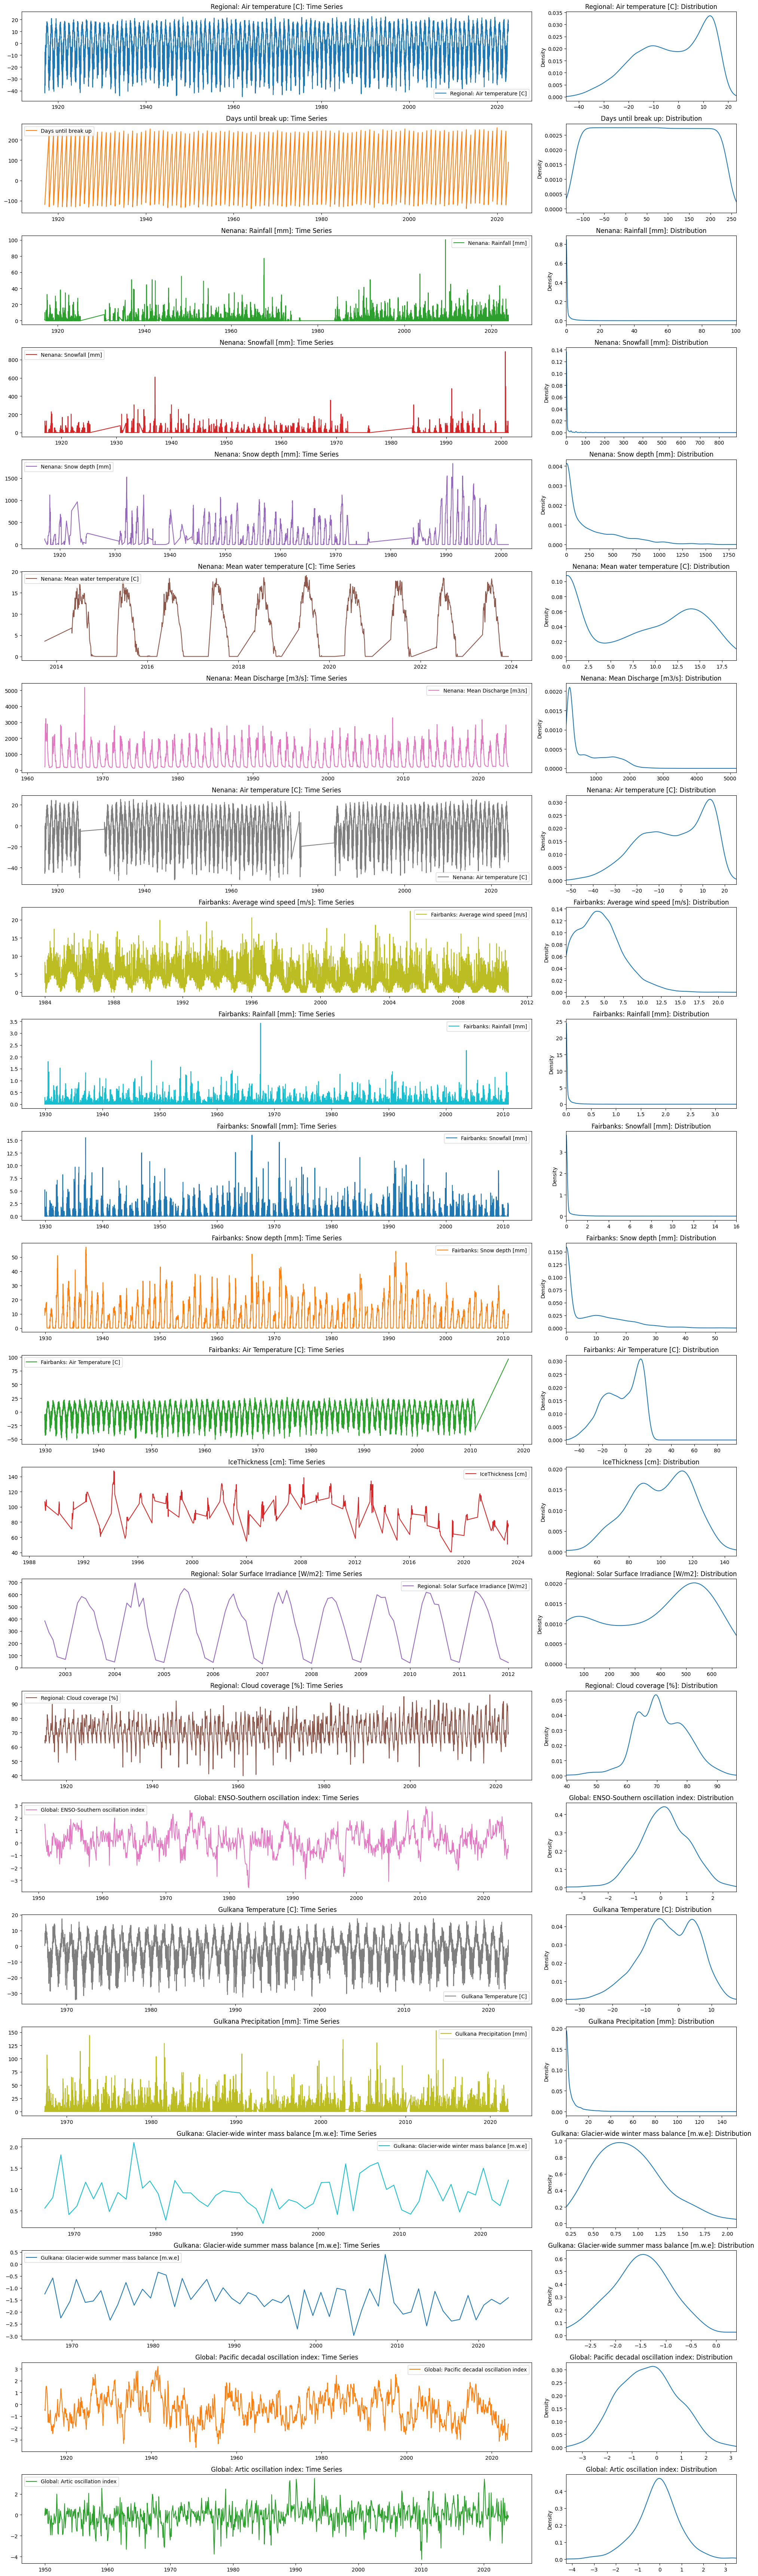

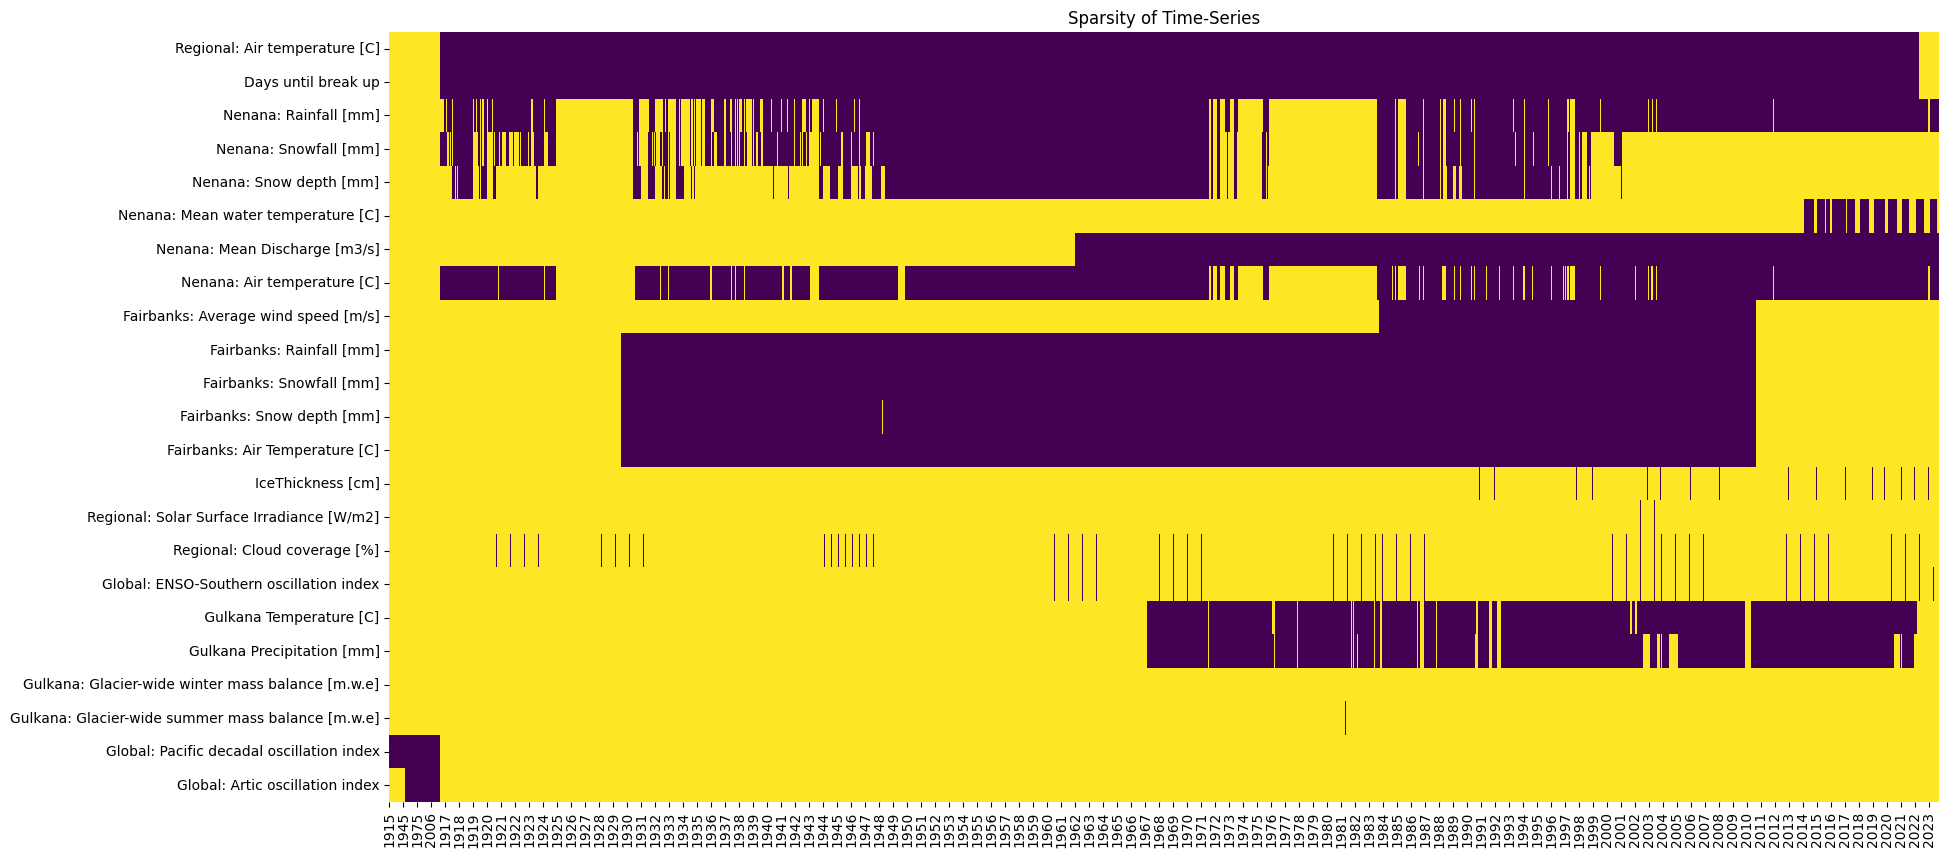

In [2]:
explore_contents(Data)

:::{card} Exercise
1. Let's examine the first output.
We have multiple columns with the same variable. For example  we have temperature data for a 1\degree x 1\degree area (~100kmx 100km ( how did we get this number??)), from  70 kilometers in the Fairbanks weather station, and  1 km from the tripod at Nenana Airport weather station.  
Discuss why we might want to have dta for 3 different location.
For our particulate case, do we need the data for all three locations? If not, which column should we keep.
Consider the same situation for the other repeated variables.

> add interactive map with pin in weather stations/drainage basin, elevation ,etc ( check with some of the hydraulic/environmental guys they may already have this setup)

2. Let's now consider the second and third plot. Considering the sparsity, distribution and range of the variables. What problem might we face if we try to use the dataframe as-it-is. 

::::



1. Lets use the function `compare_columns`to see the differences between the columns related to temperature

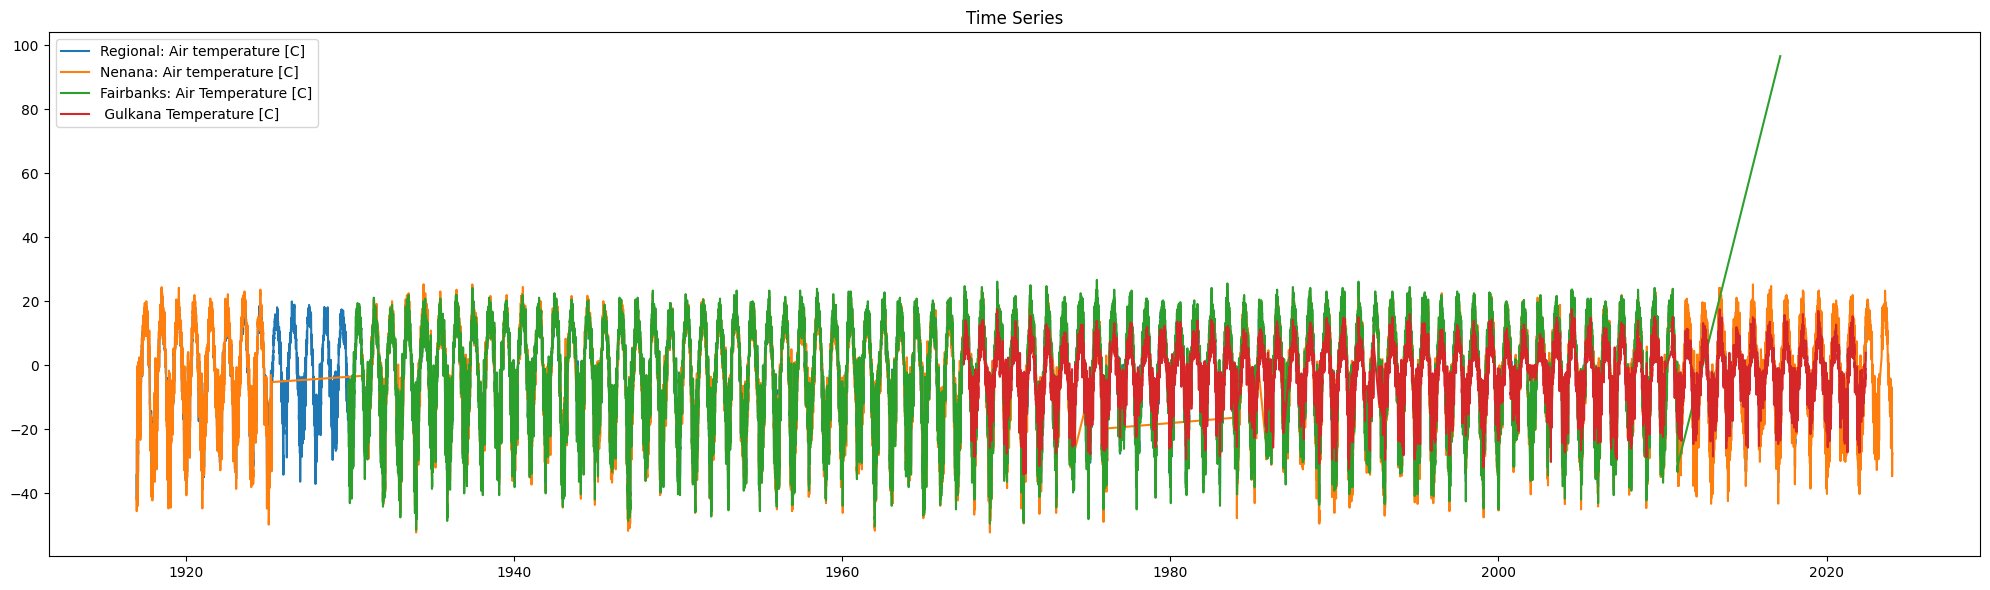

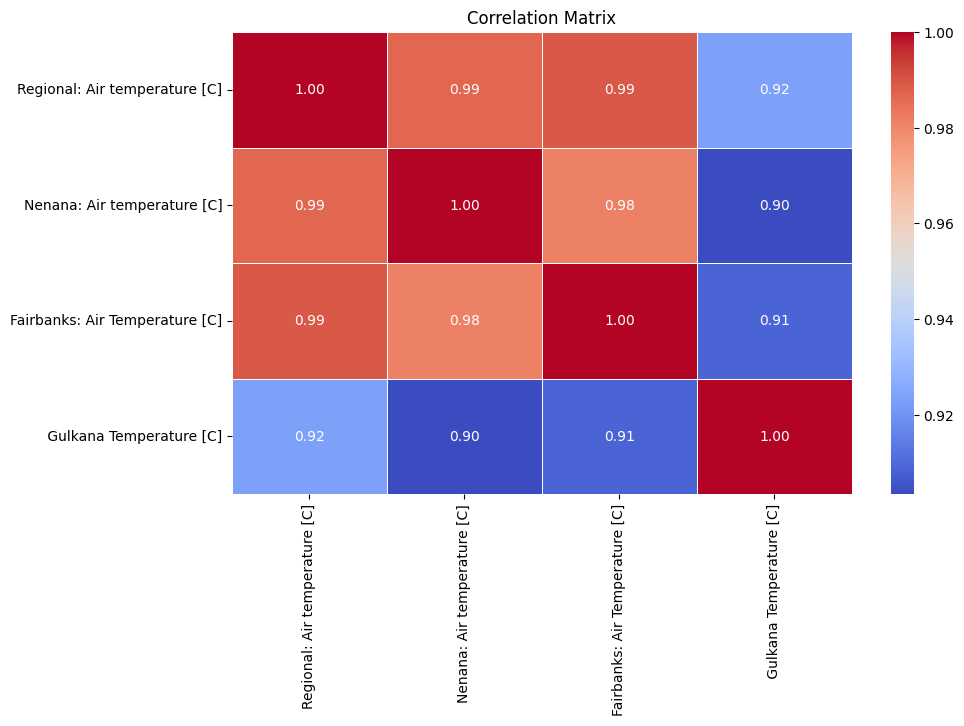

In [3]:
# The DataFrame column names we want to compare
temperature_columns = ['Regional: Air temperature [C]',
                       'Nenana: Air temperature [C]',
                       'Fairbanks: Air Temperature [C]',
                       ' Gulkana Temperature [C]']

# Call the function, correlation=True also plots the correlation matrix
compare_columns(Data, cols=temperature_columns, correlation=True)

The variables are correlated **and** from the time-series plot we see that they contain the same information (could have been correlated but one have been consistently 10 degrees higher, the correlation is not enough by itself).

Lets use the drop method to eliminate the column that we don't need.

> maybe add residual between time-series instead of just looking at them

In [4]:
Data = Data.drop(columns=temperature_columns[1:])

Lets do the same analyss for Rainfall, Snowfall

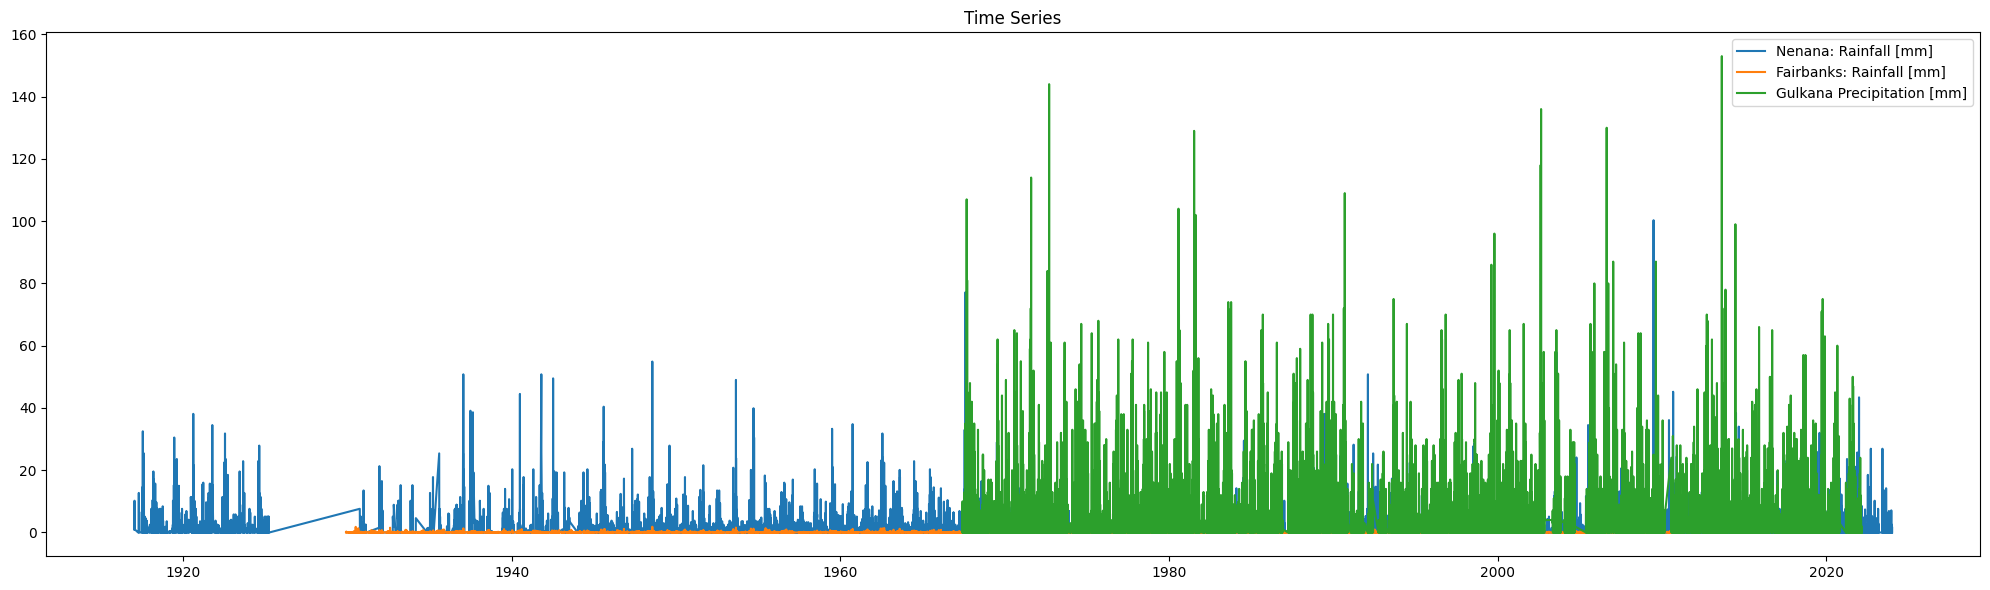

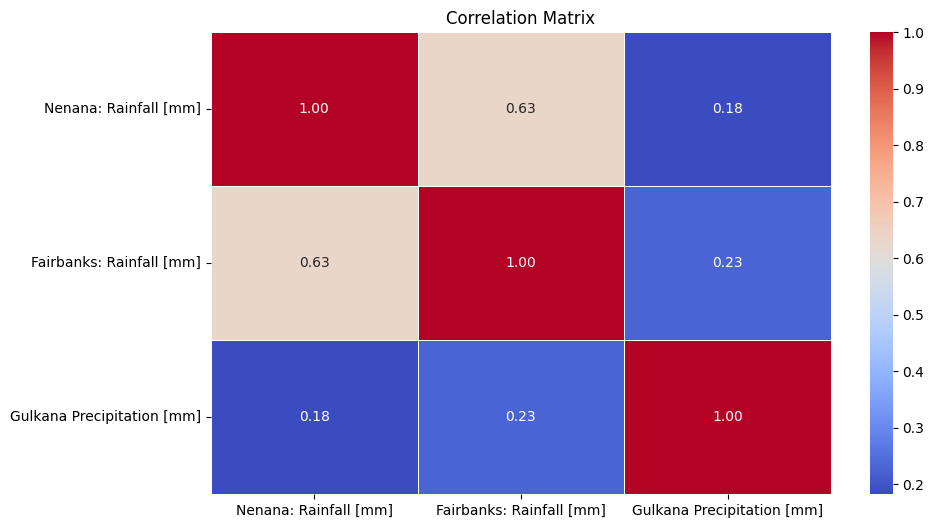

In [5]:
# The DataFrame column names we want to compare
rain_columns = ['Nenana: Rainfall [mm]',
                'Fairbanks: Rainfall [mm]',
                'Gulkana Precipitation [mm]']

# Call the function, correlation=True also plots the correlation matrix
compare_columns(Data, cols=rain_columns, correlation=True)

Perfect, the columns do not to reflect the same phenomena, firstly,  see the difference between precipitation and rainfall is it the same? Secondly, the rainfall in Nenana and Fairbanks seem to be uncorrelated, should we drop the column related to Fairbanks and Gulkana glacier then, as we care about Nenana? Maybe, both location are upriver from Nenana and rainfall might have and effect on the melting of the ice downstream. For the moment, we will drop this column but we will re-examine this decision later on



> here could pivot to coherence autocorrelation and PSD

In [6]:
Data = Data.drop(columns=rain_columns[1:])

Similarly, from the sparsity plot we decide to drop columns that are particularly sparse, again we will re-visit decision later

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40413 entries, 1915-01-01 to 2023-12-31
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Regional: Air temperature [C]        38563 non-null  float64
 1   Days until break up                  38563 non-null  float64
 2   Nenana: Rainfall [mm]                29516 non-null  float64
 3   Nenana: Snowfall [mm]                19945 non-null  float64
 4   Nenana: Snow depth [mm]              15984 non-null  float64
 5   Nenana: Mean water temperature [C]   2418 non-null   float64
 6   Nenana: Mean Discharge [m3/s]        22525 non-null  float64
 7   Fairbanks: Average wind speed [m/s]  9797 non-null   float64
 8   Fairbanks: Snowfall [mm]             29586 non-null  float64
 9   Fairbanks: Snow depth [mm]           29555 non-null  float64
 10  IceThickness [cm]                    461 non-null    float64
dtypes: float64(

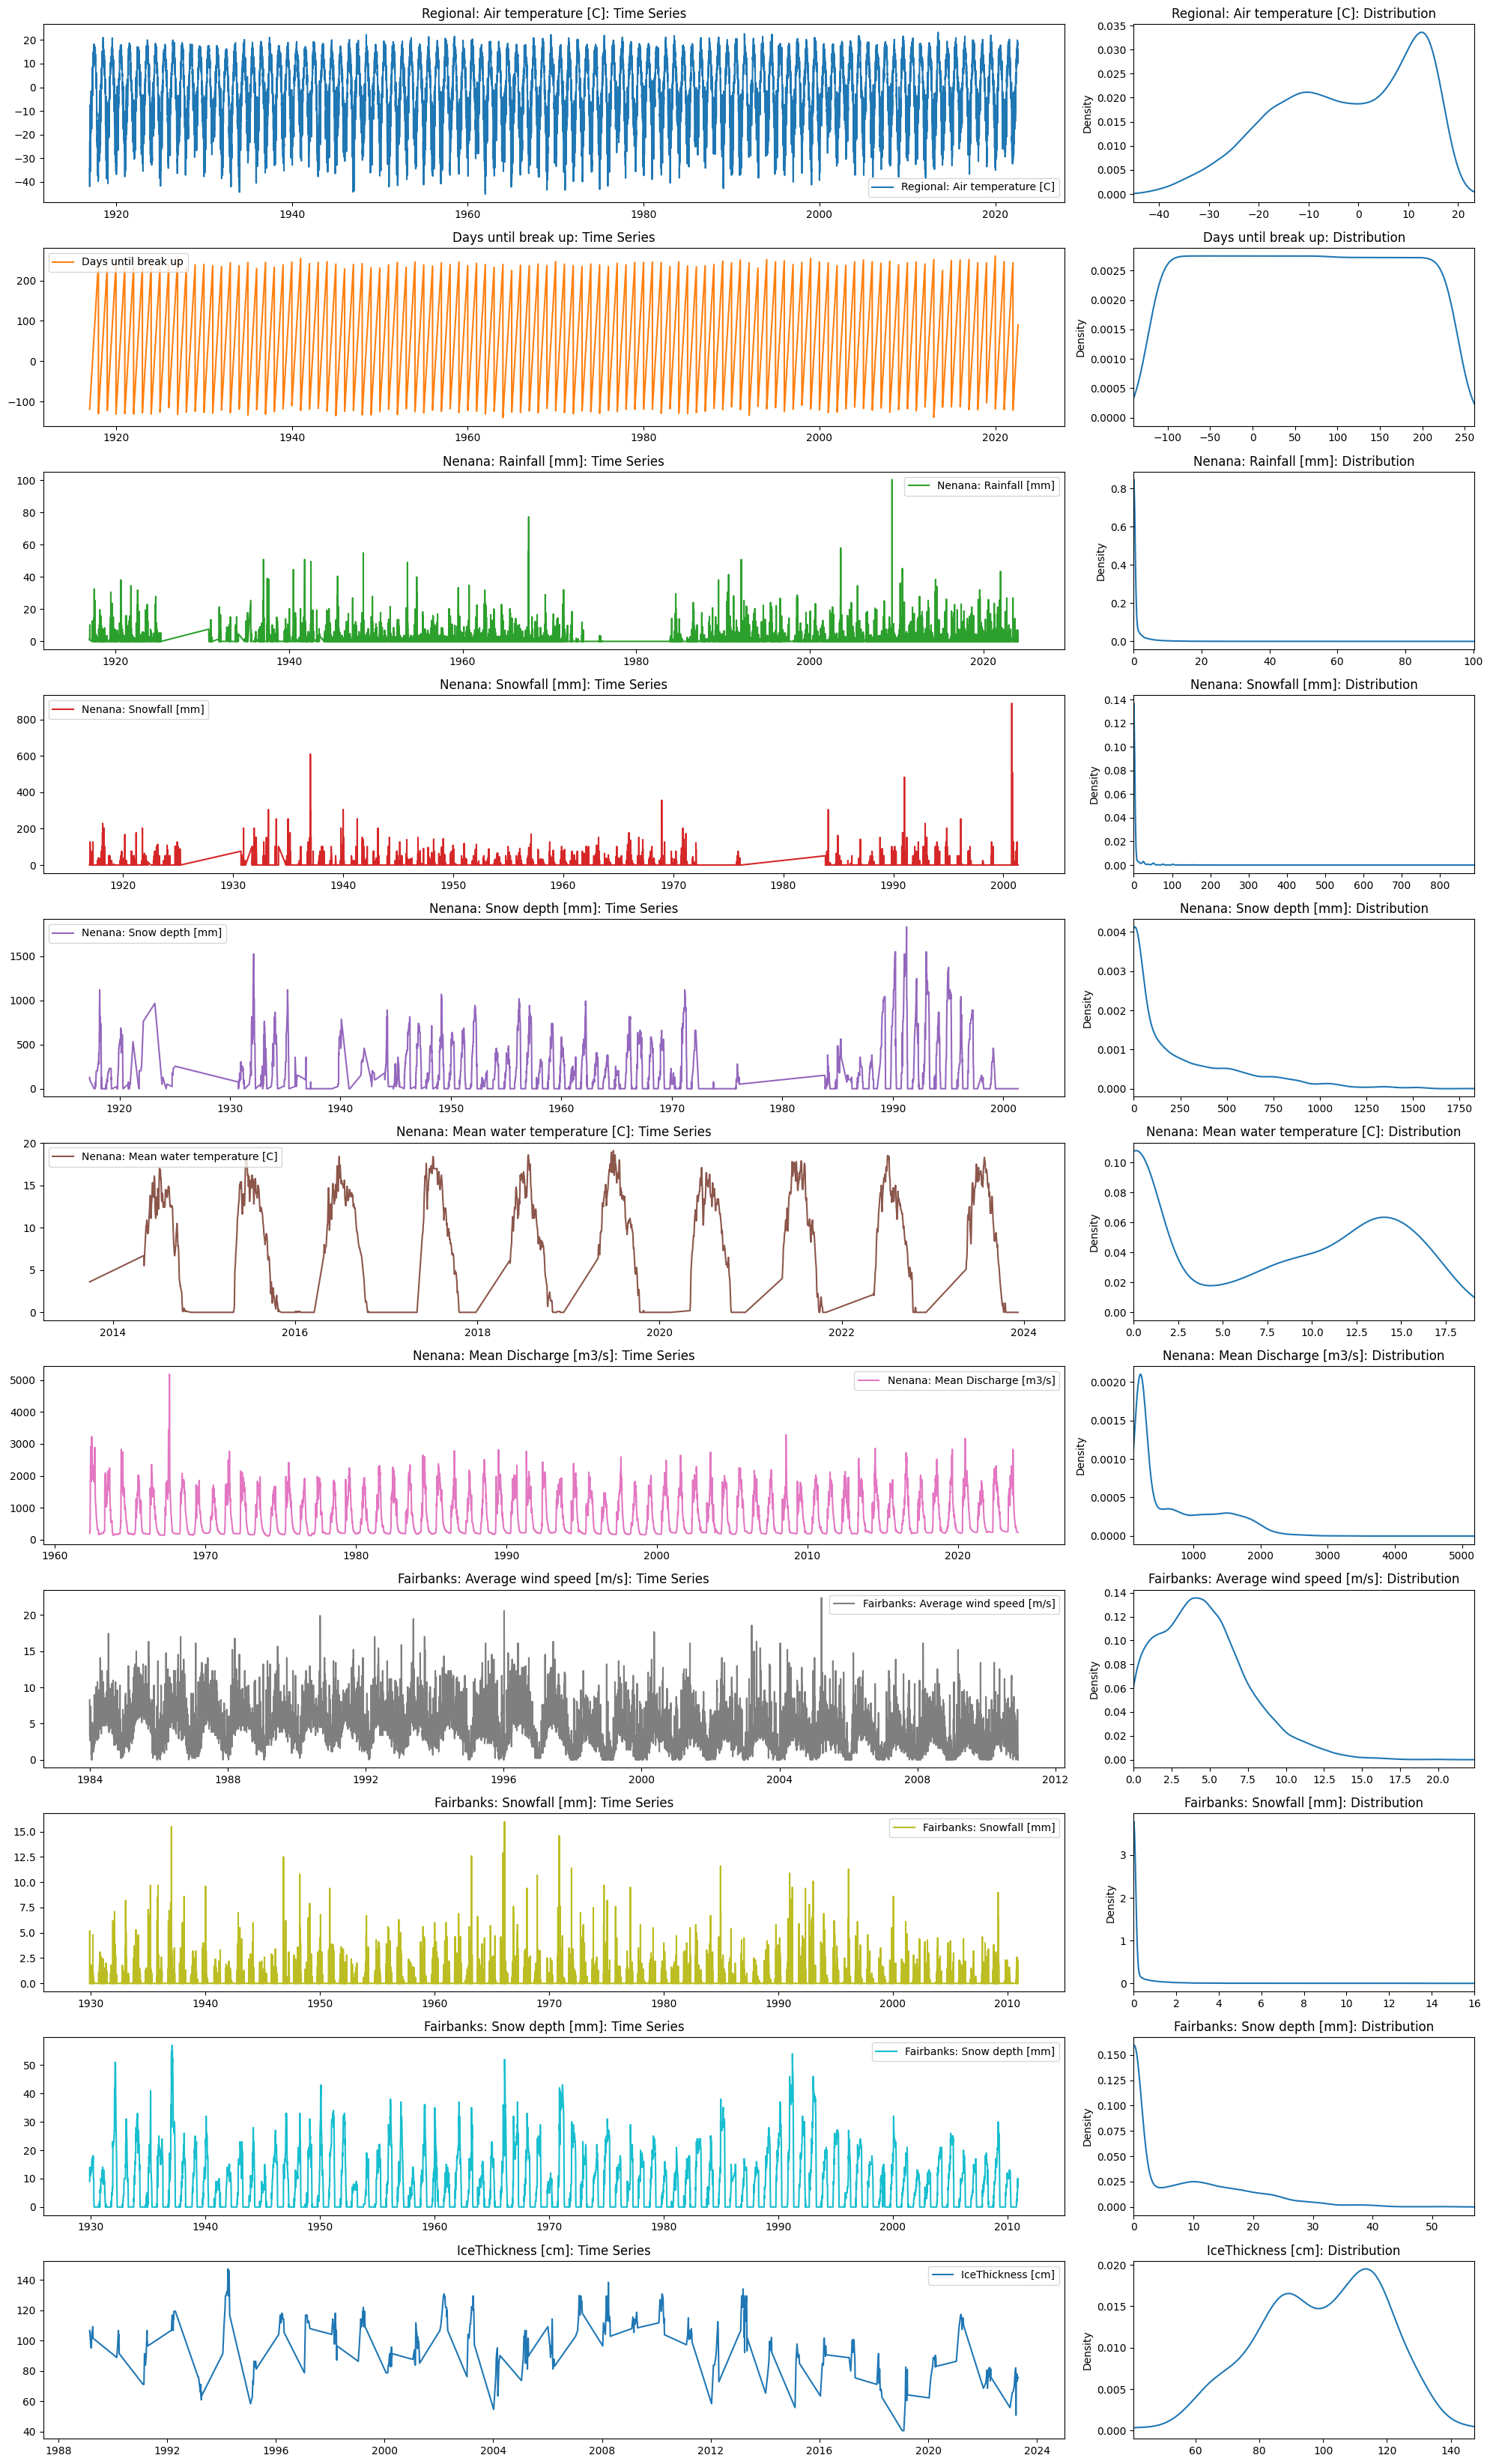

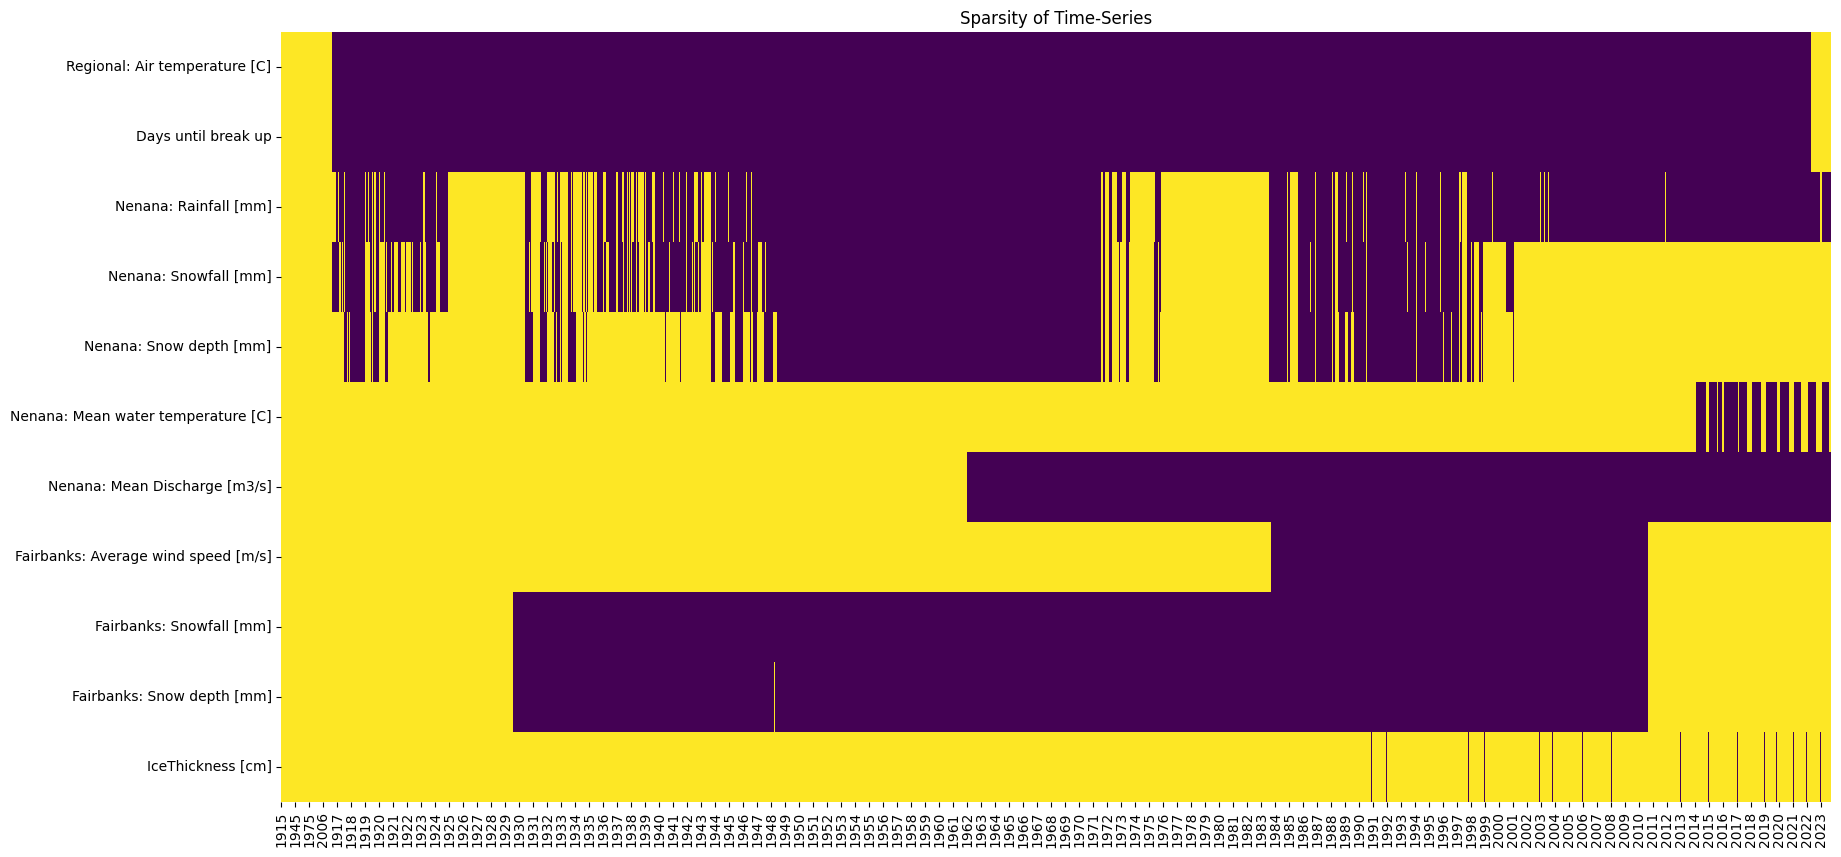

In [7]:
# The DataFrame column names that are sparse and we want to drop
sparse_columns = ['Regional: Solar Surface Irradiance [W/m2]',
                  'Regional: Cloud coverage [%]',
                  'Global: ENSO-Southern oscillation index',
                  'Gulkana: Glacier-wide winter mass balance [m.w.e]',
                  'Gulkana: Glacier-wide summer mass balance [m.w.e]',
                  'Global: Pacific decadal oscillation index',
                  'Global: Artic oscillation index']

Data = Data.drop(columns=sparse_columns)

explore_contents(Data)

Finally, we can observe that none of our selected variables have observation before 1917, so lets drop those rows from the dataset.

In [8]:
Data = Data[(Data.index.year >= 1917)]

From  the output of the functions we can observe:
1. Different columns have different 'sampling frequencies' and span different intervals
        -> Resampling
        -> Interpolation
        -> Data Augmentation

2. The data is not stationary, strong seasonality
    -> Discuss source of this?
        -physics behind this local,regional and global  oscillation.
        - pivot to PSD and BLUE

